In [22]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install openpyxl


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Survey Text Preferences: Exploring Tone Patterns

In [24]:
import pandas as pd
import re

In [25]:
df = pd.read_excel('Datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx')
df.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York,Original,Original,Simplier,Simplier,Empathetic,Empathetic,Empathetic,Simplier


In [26]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [27]:
df.shape

(50, 19)

In [28]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')
(50, 19)
na value count 2


In [29]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
# final_data.drop(['race', 'language', 'marital_status'], axis=1, inplace=True)
final_data.head(3)


,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,Original


In [30]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
    

In [31]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(clean_text)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [32]:
final_data.head(5)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,undisclosed,25000 - 49999,Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,Less than 25000,Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,Less than 25000,Student,english,i do not have a disability,Original
3,25-34,female,hispanic,undisclosed,Associate,single,Less than 25000,Employed Part time,both,i do not have a disability,Empathetic
4,18-24,male,hispanic,native american,Bachelor,single,25000 - 49999,Student,both,undisclosed,Empathetic


In [33]:
# Download the file below to combine with the cluster labels and use for analysis
# final_data.to_excel('Datasets/Dataset_w_labels.xlsx', index=False)

In [34]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

def encode_ethnicity(text):
    eth_encoding = {
        'hispanic': 1,
        'non hispanic': 0,
        'undisclosed': -1,
    }
    
    return eth_encoding.get(text, -1)

def encode_dis(text):
    dis_encoding = {
        'i have a disability': 1,
        'i do not have a disability': 0,
        'undisclosed': -1,
    }
    
    return dis_encoding.get(text, -1)


In [35]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)
# final_data['ethnicity'] = final_data['ethnicity'].apply(encode_ethnicity)
# final_data['disability'] = final_data['disability'].apply(encode_dis)

In [36]:
final_data.head(15)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,3,female,non hispanic,native american,High School,undisclosed,1,Employed Part time,both,i do not have a disability,Persuasive
1,0,male,hispanic,white,High School,single,0,Employed Part time,english,i do not have a disability,Original
2,1,female,non hispanic,multiracial,Associate,single,0,Student,english,i do not have a disability,Original
3,1,female,hispanic,undisclosed,Associate,single,0,Employed Part time,both,i do not have a disability,Empathetic
4,0,male,hispanic,native american,Bachelor,single,1,Student,both,undisclosed,Empathetic
5,1,female,non hispanic,white,Master,married,2,Employed Part time,english,i do not have a disability,Original
6,0,female,hispanic,white,Associate,single,-1,Student,both,i do not have a disability,Empathetic
7,1,non binary,hispanic,Puerto Rican,Associate,divorced,2,Employed Part time,both,undisclosed,Original
8,1,female,hispanic,undisclosed,Bachelor,single,0,Student,both,i do not have a disability,Original
9,1,female,hispanic,undisclosed,Associate,single,4,Student,both,i do not have a disability,Empathetic


In [38]:
encoded_data = pd.get_dummies(final_data)

In [39]:
# encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training.xlsx', index=False)
# encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training_2.xlsx', index=False)
# encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training_short.xlsx', index=False)
encoded_data.to_excel('Datasets/Encoded_Data_for_Model_Training_long.xlsx', index=False)

## Hierarchical Clustering

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


### Test Model w/ different distances on Agglomerative clustering

In [41]:
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import datasets




distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Iterate over each distance metric
for metric in distance_metrics:
    # Initialize agglomerative clustering model with the appropriate linkage method
    if metric == 'euclidean':
        linkage_method = 'ward'  # For Euclidean distance, use 'ward' linkage
    elif metric == 'manhattan':
        linkage_method = 'average'  # For Manhattan distance, use 'average' linkage
    else:
        linkage_method = 'average'  # For Cosine similarity, use 'average' linkage
        
    model = AgglomerativeClustering(n_clusters=3, affinity=metric, linkage=linkage_method)
    
    # Fit the model to the data
    clusters = model.fit_predict(encoded_data)
    
    # Evaluate clustering performance
    silhouette = silhouette_score(encoded_data, clusters)
    
    print(f"Clustering with {metric} metric has silhouette score: {silhouette}")

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clustering with euclidean metric has silhouette score: 0.19697039633923197
Clustering with manhattan metric has silhouette score: 0.1122822983194823
Clustering with cosine metric has silhouette score: 0.12795365499084027


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


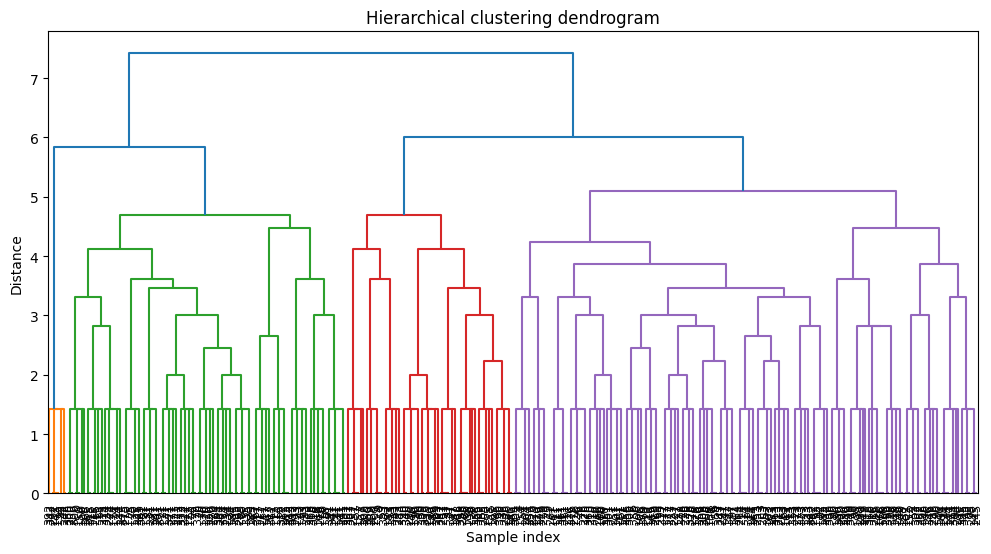

In [42]:
# model
model = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
clusters = model.fit_predict(encoded_data)

# linkage matrix
linkage_matrix = linkage(encoded_data, method='complete')  # Use 'average' method

# plot dendrogram
plt.figure(figsize=(12, 6))
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical clustering dendrogram')
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.savefig('Visualizations/dendrogram.png')
plt.show()
